In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def load_wav(filepath, sampling_rate=44100):
    """loads a wav file"""

    y, sr = librosa.load(filepath, sr=sampling_rate)
    return y, sr


# STFT

In [7]:
audio_file = "/home/thanos/Documents/Thesis/audio/TheBeatles/01_-_Please_Please_Me/01_-_I_Saw_Her_Standing_There.wav"

y, sr = load_wav(audio_file, sampling_rate=44100)

stft = librosa.stft(y, hop_length=4410, n_fft=8192)

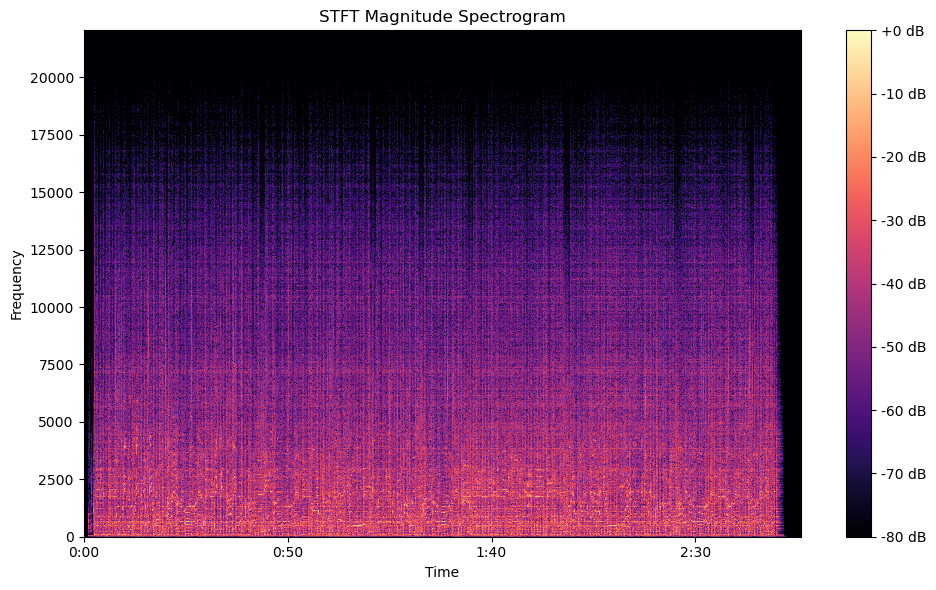

In [15]:
# Visualize the magnitude spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(abs(stft), ref=np.max), sr=sr, hop_length=4410, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Chroma CQT

In [21]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

# use Constant Q Transform to calculate Pitch Class Profile (PCP), normalized
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=44100, hop_length=4410)




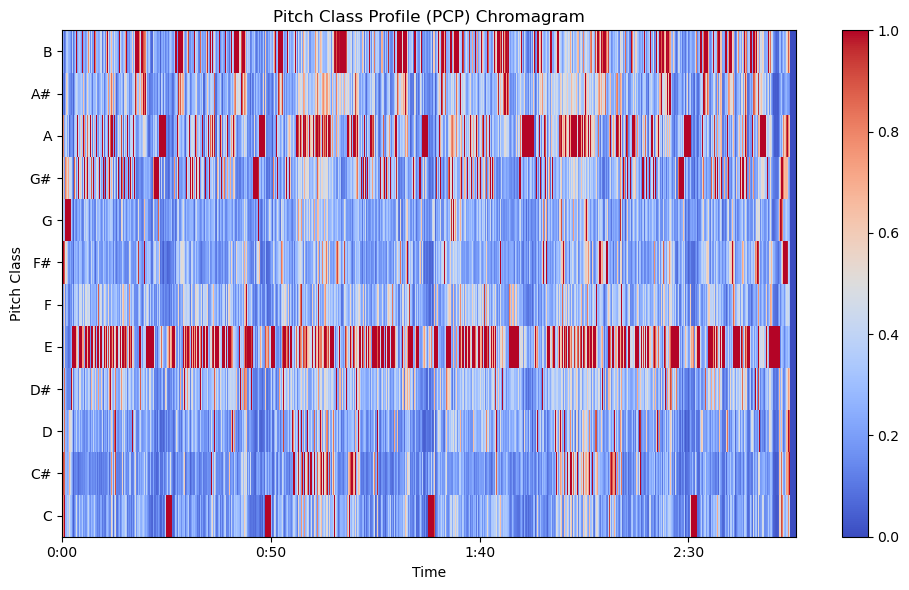

In [22]:
# Define pitch class labels
pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Visualize the chromagram with pitch class labels
plt.figure(figsize=(10, 6))
librosa.display.specshow(chromagram, sr=sr, hop_length=4410, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Pitch Class Profile (PCP) Chromagram')
plt.xlabel('Time')
plt.ylabel('Pitch Class')
plt.yticks(range(len(pitch_classes)), pitch_classes)  # Annotate y-axis with pitch class labels
plt.tight_layout()
plt.show()

# CQT Transform

In [24]:
def cqt_spectogram(audio, sample_rate, nbins, bins_per_octave, hop_length):
    """
    Performs CQT transform to an audio file

    :param audio: audio file in a waveform format
    :param sample_rate:
    :param nbins:
    :param bins_per_octave:
    :param hop_length:
    :return:
    """

    track_time = librosa.get_duration(y=audio, sr=sample_rate)
    spectrogram = librosa.cqt(audio, sr=sample_rate, n_bins=nbins, bins_per_octave=bins_per_octave,
                              hop_length=hop_length)

    frames = list(range(0, spectrogram.shape[1]))
    times = librosa.frames_to_time(frames, sr=sample_rate, hop_length=hop_length)

    timeseries = librosa.amplitude_to_db(abs(spectrogram), ref=np.max).T
    return timeseries, times, track_time


In [25]:
timeseries, times, track_time = cqt_spectogram(audio=y, sample_rate=sr, nbins=192, bins_per_octave=24,
                                            hop_length=4096)

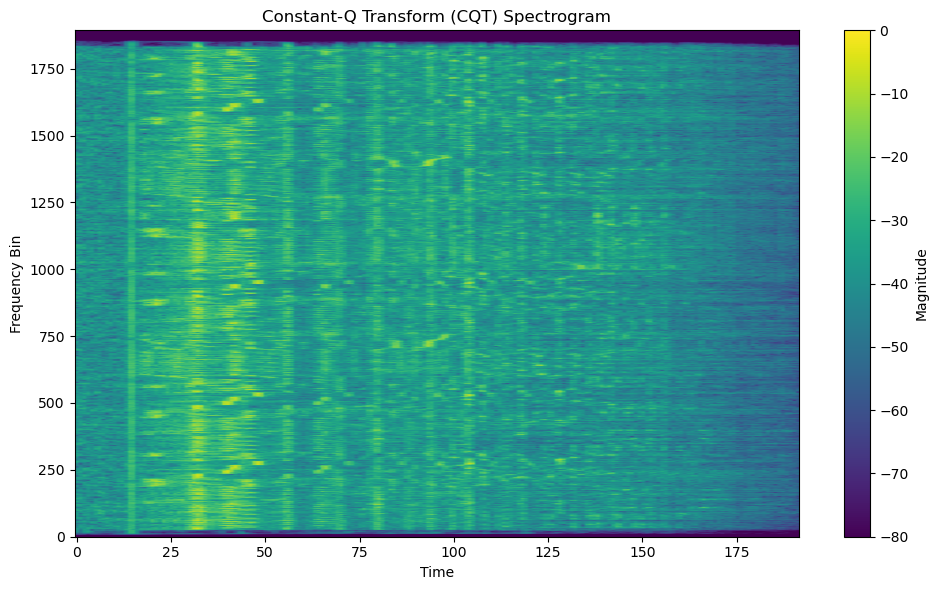

In [26]:
# Visualize the CQT spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(timeseries, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.title('Constant-Q Transform (CQT) Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency Bin')
plt.tight_layout()
plt.show()